# Challenge Frequência e Medidas

### Desafio 1: O perfil do Catálogo da Netflix

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle

Este conjunto de dados consiste na lista de filmes e suas respectivas e
suas informações.
Variáveis:
● show_id - id único do filme/série.

● title - título do filme ou série

● director - diretor do filme ou série

● cast - elenco do filme ou série

● country - país do filme ou série

● date_added - data que foi adicionado no Netflix

● reading score - ano de lançamento original do filme

● rating - classificação da televisão

● duration - duração total do filme ou série.

● listed_in - categoria ou gênero do filme ou série.

● description -descrição do filme ou série.

● type - tipo de filme ou série

Os dados são arquivos em .csv.

### 📝 Tarefas:
### 1. Exploração inicial:
   
●  Quantas linhas e colunas tem o dataset?



In [10]:
#importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
#importando o dataset
df = pd.read_csv("netflix_titles_nov_2019.csv")
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [12]:
#Quantas linhas e colunas tem o dataset?
linhas, colunas = df.shape
print(f"O dataset tem {linhas} linhas e {colunas} colunas")

O dataset tem 5837 linhas e 12 colunas


In [13]:
#Quais são os tipos das variáveis e se há valores ausentes?
#verificando o tipo de variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


● Quais são os tipos das variáveis e se há valores ausentes?

In [14]:
#contando quantos valores ausentes (`NaN`) existem em cada coluna.

nulos = df.isnull().sum()
nulos

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

### 2. Análises de frequência:

● Qual a proporção de filmes vs. séries no catálogo?



In [15]:
#Qual a proporção de filmes vs. séries no catálogo?

#df.head()
#value_counts -> contando quantas vezes cada categoria aparece na coluna `type`.
#`normalize=True` faz com que os valores sejam expressos em proporção.
# Multiplicando por 100 e convertendo para porcentagem.

proporcao = df['type'].value_counts(normalize=True) * 100

print("Proporção de Filmes vs. Séries no catálogo:")
print(proporcao)

Proporção de Filmes vs. Séries no catálogo:
type
Movie      67.483296
TV Show    32.516704
Name: proportion, dtype: float64


● Qual o gênero mais frequente?

In [ ]:
#df.head()

# O método .str.split(', ') divide cada string da coluna em uma lista de gêneros separando pelo ", " (vírgula + espaço).
# O método .explode() separa os valores de uma lista, criando uma nova linha para cada item da lista.
separacao_generos = df['listed_in'].str.split(', ').explode()


# contando quantas vezes cada gênero aparece na coluna separacao_generos
conta_genero = separacao_generos.value_counts() 

# retorna o gênero mais frequente na contagem.
mais_frequente = conta_genero.idxmax()
print(f'\nO gênero mais frequente do Catálogo da Netflix é: {mais_frequente}')


O gênero mais frequente do Catálogo da Netflix é: International Movies


### 3. Análises estatísticas:
● Qual a média, mediana e moda do tempo de duração dos filmes?



In [18]:
df = df[df['type'] == 'Movie']
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie


In [19]:
# Criando uma nova coluna duration_intrecebe os valores de duration
# .str.replace(' min', '') removendo o texto "min" e substituindo por nada.
# .astype(int) Convertendo para inteiro
df['duration_int'] = df['duration'].str.replace(' min', '').astype(int)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,duration_int
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,67
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,135
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,106
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,107
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,81


In [ ]:
#df.head()

# Filtrar apenas os filmes (onde 'duration' não é nulo e tem a palavra 'min' e são diferentes de nulo -> na=False)
filmes = df[df['duration'].notnull() & df['duration'].str.contains('min', na=False)]

# : na parte antes da vírgula significa "selecione todas as linhas" do DataFrame. Após a virgula está acessando a coluna 'duration' do DataFrame filmes para modificar seus valores no DataFrame original.

# utilizado filmes['duration'].str.replace(' min', '', regex=False)  para remover o sufixo " min" da coluna 'duration' e deixar apenas o número da duração de cada filme. 
filmes.loc[:, 'duration'] = filmes['duration'].str.replace(' min', '', regex=False)

# to_numeric -> convertendo 'duration' para inteiro, ignorando erros
filmes.loc[:, 'duration'] = pd.to_numeric(filmes['duration'], errors='coerce')

# Remover valores nulos resultantes da conversão
#parâmetro subset é usado para especificar as colunas nas quais a operação será aplicada. 
filmes = filmes.dropna(subset=['duration'])

# Calcular média, mediana e moda
media_duracao = filmes['duration'].mean()
mediana_duracao = filmes['duration'].median()

#Calculando a moda , que é o valor mais frequente na coluna. 
# O índice [0] representa o primeiro valor da moda (ou seja, o valor mais comum na coluna "duration").
moda_duracao = filmes['duration'].mode()[0]

# Exibir os resultados
print(f"Média da duração dos filmes: {media_duracao:.2f} minutos")
print(f"Mediana da duração dos filmes: {mediana_duracao:.2f} minutos")
print(f"Moda da duração dos filmes: {moda_duracao} minutos")

Média da duração dos filmes: 98.03 minutos
Mediana da duração dos filmes: 97.00 minutos
Moda da duração dos filmes: 90 minutos


● Qual o filme mais curto e mais longo?

In [24]:
# Encontrando o filme mais curto
min_duracao_filme = df['duration_int'].min()

# Encontrar o filme mais longo
max_duracao_filme = df['duration_int'].max()

# Armazenar a duração dos filmes
#filme_mais_curto['duration'].values[0]
#filme_mais_longo['duration'].values[0]


filme_mais_curto = df[df['duration_int'] == min_duracao_filme]['title'].values
filme_mais_longo = df[df['duration_int'] == max_duracao_filme]['title'].values

print(f'O filme mais curto é {filme_mais_curto[0]} com duração de {min_duracao_filme} minutos')
print(f'O filme mais longo é {filme_mais_longo[0]} com duração de {max_duracao_filme} minutos')



O filme mais curto é Silent com duração de 3 minutos
O filme mais longo é Black Mirror: Bandersnatch com duração de 312 minutos


### 4. Visualização de dados:

● Criar um gráfico de barras para mostrar a quantidade de títulos
por gênero.


C:\Users\ACER\AppData\Local\Temp\ipykernel_1968\1230547676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conta_genero.index, y=conta_genero.values, palette="viridis")


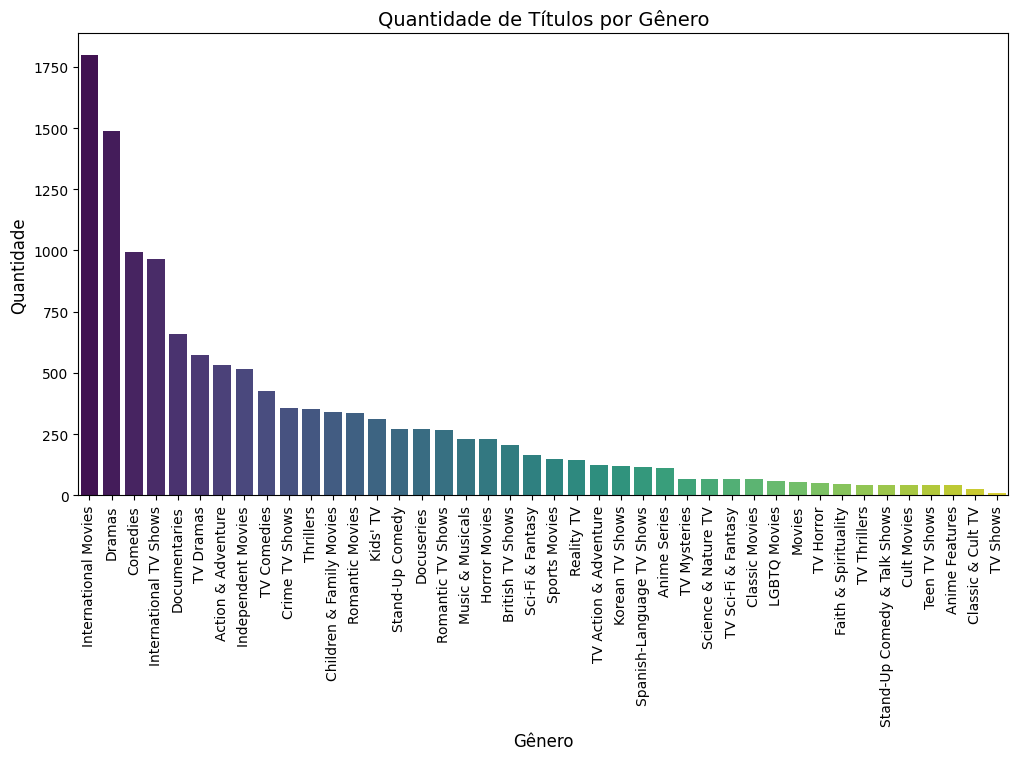

In [9]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Definir o tamanho do gráfico
sns.barplot(x=conta_genero.index, y=conta_genero.values, palette="viridis")

# Adicionar título e rótulos
plt.title('Quantidade de Títulos por Gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade',fontsize=12)

plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo X para melhor leitura

plt.show()


● Criar um histograma para analisar a distribuição da duração dos
filmes.

<Figure size 800x1000 with 0 Axes>

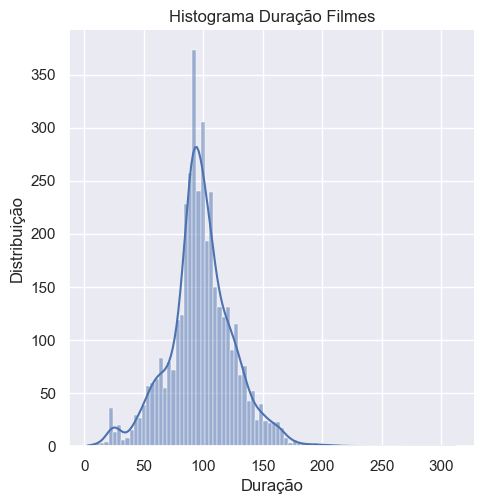

In [25]:
plt.rcParams['figure.figsize'] = [8,10]
sns.set_theme(style = 'darkgrid')

plt.figure()
sns.displot(df['duration_int'], kde = True)
plt.title("Histograma Duração Filmes")
plt.xlabel('Duração')
plt.ylabel('Distribuição')
plt.show()